In [1]:
import img_utils
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pprint import pprint

%matplotlib inline



In [2]:
nb = pd.read_csv('nb_data.csv', index_col=0)
lr = pd.read_csv('lr_data.csv', index_col=0)

In [3]:
nb

,fit_time_mean,fit_time_std,score_time_mean,score_time_std,test_score_mean,test_score_std,train_score_mean,train_score_std
1,0.007662,0.000672,0.002518,0.000441,0.566331,0.004086,0.565392,0.002159
2,0.005605,0.001319,0.007014,0.004568,0.579330,0.002749,0.580542,0.002183
4,0.007344,0.000534,0.005539,0.001196,0.602028,0.001989,0.601751,0.001944
8,0.300641,0.194836,0.097632,0.076251,0.617782,0.002737,0.617673,0.001741
16,0.123467,0.004338,0.115168,0.006077,0.629571,0.002397,0.629627,0.002550
32,2.282713,0.040705,0.499451,0.037777,0.641028,0.005638,0.642242,0.004375
64,7.093280,0.130207,2.822970,0.054196,0.646427,0.005298,0.647807,0.002910
128,71.114019,0.002085,38.197773,13.548059,0.646538,0.004278,0.648578,0.002618


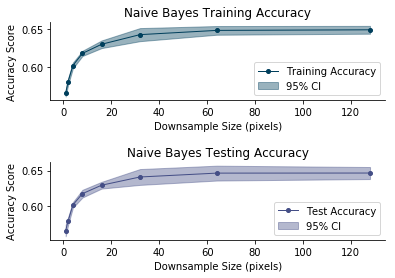

In [12]:
fig, axs = img_utils.make_subplot(rows=2, cols=1)
img_utils.lineplot_ci(axs[0], nb.index, 
                   list(nb['train_score_mean']), list(nb['train_score_std']), 
                   label="Training Accuracy", title="Naive Bayes Training Accuracy",
                   x_label="Downsample Size (pixels)", y_label="Accuracy Score",
                   color=0)
img_utils.lineplot_ci(axs[1], nb.index, 
                   list(nb['test_score_mean']), list(nb['test_score_std']), 
                   label="Test Accuracy", title="Naive Bayes Testing Accuracy",
                   x_label="Downsample Size (pixels)", y_label="Accuracy Score",
                   color=1)
plt.subplots_adjust(hspace = 0.8)
# plt.savefig('../report/nb_graph.png', dpi=300, bbox_inches='tight')

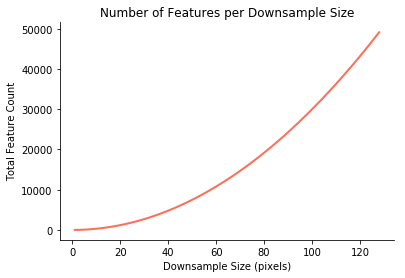

In [38]:
sizes = np.linspace(1, 128, 100)
features = [3*size**2 for size in sizes]
fig, axs = img_utils.make_subplot(rows=1, cols=1)
img_utils.lineplot(axs, sizes, features, 
                   label="Feature Count", x_label="Downsample Size (pixels)", y_label="Total Feature Count",
                   title="Number of Features per Downsample Size", color=4
                  )
# plt.savefig('../report/feature_graph.png', dpi=300, bbox_inches='tight')

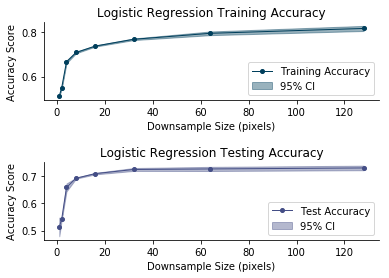

In [8]:
fig, axs = img_utils.make_subplot(rows=2, cols=1)
img_utils.lineplot_ci(axs[0], lr.index, 
                   list(lr['train_score_mean']), list(lr['train_score_std']), 
                   label="Training Accuracy", title="Logistic Regression Training Accuracy",
                   x_label="Downsample Size (pixels)", y_label="Accuracy Score",
                   color=0)
img_utils.lineplot_ci(axs[1], lr.index, 
                   list(lr['test_score_mean']), list(lr['test_score_std']), 
                   label="Test Accuracy", title="Logistic Regression Testing Accuracy",
                   x_label="Downsample Size (pixels)", y_label="Accuracy Score",
                   color=1)
plt.subplots_adjust(hspace = 0.8)
# plt.savefig('../report/lr_graph.png', dpi=300, bbox_inches='tight')